# Исследование интернет - магазина компьютерных игр

В моем распоряжении данные с интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Наша задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Нужно отработать принцип работы с данными.

**Цель исследования:**
1. Посчитайте суммарные продажи во всех регионах.
2. Определить какое кол-во игр выпускалось в разные годы.
3. Выяснить как менялись продажи по платформам.
4. Составить прогноз продаж на 2017 год, по актуальному периоду.
5. Выявить потенциально прибыльные платформы и определить какие из них лидируют по продажам, растут или падают?
6. Построить диаграммы размаха по глобальным продажам игр в разбивке по платформам.
7. Определить корреляцию между отзывами и продажами.
8. Обосновать какие жанры игр самые прибыльные. 
9. Выявить самые популярные жанры и платформы для пользователя каждого региона.
10. Определить влияние рейтинга компьютерных игр на продажи в отдельных регионах.
11. Сформулировать и проверить нуливую и альтернативную гипотезы.

**Ход исследования**
   
 Данные продаж интернет-магазина «Стримчик» возьму из файла  '/datasets/games.csv'. О особенностях данных  ничего не известно. Для начала нужно обследовать данные. После чего приступать к выполнению целей.
 Проверю данные на наличие пропусков и определю их влияние на исследование. После чего приступлю к предобработки данных, удалю, заменю и отфильтрую там, где это возможно. 
 
 В итоге мое исследование пройдет в шесть этапов:
 
   * Обследование данных.
   * Подготовим данные.
   * Выполним исследовательский анализ данных .
   * Составим портрет пользователя каждого региона.
   * Проверим гипотезы.  
   * Изложение общего вывода.

### Откройте файл с данными и изучите общую информацию

In [6]:
# Импортируем библеотеку pandas и сокращаем название библеотеки для удобства: "pd".
import pandas as pd 
# Разворачиваем все столбцы датафрейма для удобства.
pd.set_option('display.max_columns', None)
# Форматируем числа с плавающей запятой для удобного отображения 
pd.options.display.float_format = "{0:.2f}".format
#импортируем библиотеку
import warnings 
# отключаем предупреждения
warnings.filterwarnings('ignore')
# Импортируем библеотеку
import numpy as np
# Добавляем библеотеку для построения диаграмм
import matplotlib
import matplotlib.pyplot as plt
# Импортируем библеотеку для построения ящиков с 'усами'
import seaborn as sns
pd.options.display.float_format = "{0:.2f}".format

In [7]:
# Создадим переменную в которой будет лежать весь датасет.
path = ('https://code.s3.yandex.net/datasets/')
data = pd.read_csv(path + 'games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
# Посмотрим на информацию о датасете, используя метод info().
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Проверим столбцы на явные и неявные дубликаты

In [9]:
# Проверяем датаcет на наличие явных дубликатов
data.duplicated(subset = ['Name', 'Platform', 'Year_of_Release']).sum()

2

In [10]:
# Выведем уникальные значения для проверки неявных дубликатов
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

- Так как наличие дубликатов нужно искать по ключевым столбцам, были выбраны для проверки три столбца 'Name', 'Platform', 'Year_of_Release'. 
- Проверка на явные дубликаты проводим по сумме параметров имеются два дубликата, устраним их при проверки в следующем разделе после приведения столбцов к нижнему регистру.
- Неявные дубликаты проверены в столбцах 'Platform', 'Year_of_Release', значения состоящие из одного набора, расположенных в разном порядке не найдены.

### Подготовим данные

#### Заменим названия столбцов (приведем к нижнему регистру)

In [68]:
# Проходим итерацией и преобразуем каждый столбец к нижнему регистру
data.columns = data.columns.str.lower()

#### Проверим ключевые столбцы на явные и неявные дубликаты

После приведения столбцов датасета к нижнему регистру, проведем проверку на явные и неявные дубликаты

In [14]:
# Проверка на явные дубликаты
data.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

2

In [15]:
# Удалим два дубликаты
data = data.drop_duplicates(subset = ['name', 'platform', 'year_of_release'])
# Проверим удаление
data.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

0

In [16]:
# Проверим столбы на наличие неявных дубликатов
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Неявных дубликатов не обнаруженно

#### Преобразуем данные в нужные типы. 

In [18]:
# Проверим тип данных в каждом столбце
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [19]:
# Проверим столбец на наличие пропусков и выведим кол-во
data['year_of_release'].isna().sum()

269

In [20]:
#Так как в стобце выпуска игр вещественный тип и имеются пропущенные значения,
# для начала преобразования типа в int, удалим все пропуски.
data = data.dropna(subset = ['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')


In [21]:
# Убедимся удалили ли пропущенные значения
data['year_of_release'].isna().sum()

0

In [22]:
# В столбце оценки критиков имеется много пропущенных значений, и он является вещественным оставим как есть.
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [23]:
# В столбце оценки пользователей имеется как пропущенные значения 'nan', так и 'tbd' - означает "To Be Determined" - т.е., оценка будет определена позже. 
# Отличии 'tbd' от 'nan' только лишь в том , что оценок было мало для усреднения и они были заполены 'tbd',Обработайте пропуски при необходимости: поэтому заменим строки с 'tbd' для удобства в дальнейшем.
# И преобразуем в вещественный тип, так как это оценки.
data['user_score'].unique()
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex = True)
data['user_score'] = pd.to_numeric(data['user_score'])
data['user_score'].dtypes

dtype('float64')

**Причины изменения типа данных:**

- В столбце года выпуска компьютерных игр был тип данных вещественный, год не может быть дробным числом поэтому мы заменили его на целочисленный, но так как в данном столбце было небольшое количество пропущенных значений, мы их удалили. Причина появления пропусков в данном случае случайна, так как маленькое количество и скорее всего это человеческий фактор.
- Столбец оценки критиков имеет много пропусков, видимо данные игры не попадали под оценку. Принял решение оставить их как есть.
- В столбце оценки пользователей много пропущенных значений вида 'nan', но также имеются и неизвестные значения когда оценка определяется позже в виде 'tbd', эти пропуски мало чем отличаются, поэтому приняли решение заменить их на 'nan', для удобства. И преобразовали тип данных в вещественный, так как это оценки и они должны отображаться в числовом виде. 

#### Обработаем пропуски при необходимости:

In [24]:
# Посмотрим кол-во в процентах пропусков в столбцах 
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [25]:
# Посмотрим кол-во пропусков по столбцам
data.isna().sum()

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         8982
rating             6677
dtype: int64

In [26]:
# Удалим пропуски в столбце названия игры
data = data.dropna(subset = ['name'])
data['name'].isna().sum()

0

In [27]:
# Удалим пропуски в стобце игровые жанры
data = data.dropna(subset = ['genre'])
data['genre'].isna().sum()

0

In [28]:
# Столбец rating — рейтинг от организации ESRB, имеет пропущенные значения, заменим их на подходящее по смыслу слово 'Неизвестный'.
# И оставим тип данных как есть.
data['rating'] = data['rating'].fillna('unknown')
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

- Удалили пропуски в столбцах 'название игр', 'игровой жанр', так как пропущенных значений очень мало и они никак не повлияют на дальнейшие действия. Пропуски могли возникнуть из-за ошибки заполнения, а так же человеческого фактора.
- Столбец рейтинг от организации ESRB эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию, поэтому можно сказать, что пропуски возникли не просто так, возможно такие игры не попадали под  сертификацию.

#### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец

In [29]:
# Создаем столбец и проходим агрегирующию функцию суммы по каждой строке, а пареметром axis указываем ось по каждому столбцу.
data['sum_sales'] = data[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Определим важны ли данные за все периоды

Text(0, 0.5, 'Кол-во игр')

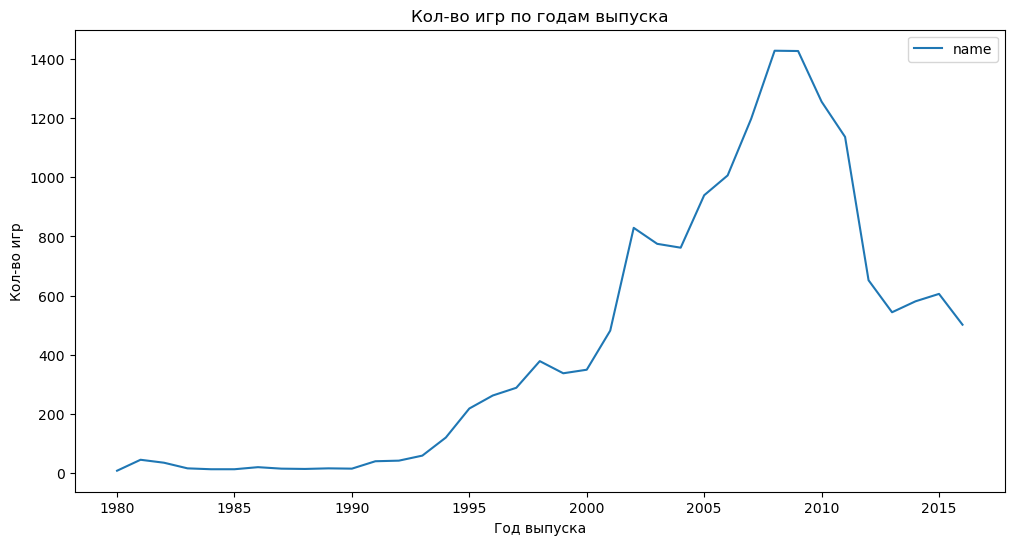

In [30]:
# Сгруппируем по годам количество игр используя сводную таблицу, и применим метод plot() для построения 
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(figsize=(12, 6))
plt.title('Кол-во игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во игр')

Самое большое кол-во игр выпускалось в 2007 по 2010 год. С 2010 года началось снижение количества игр.

#### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постройте распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы

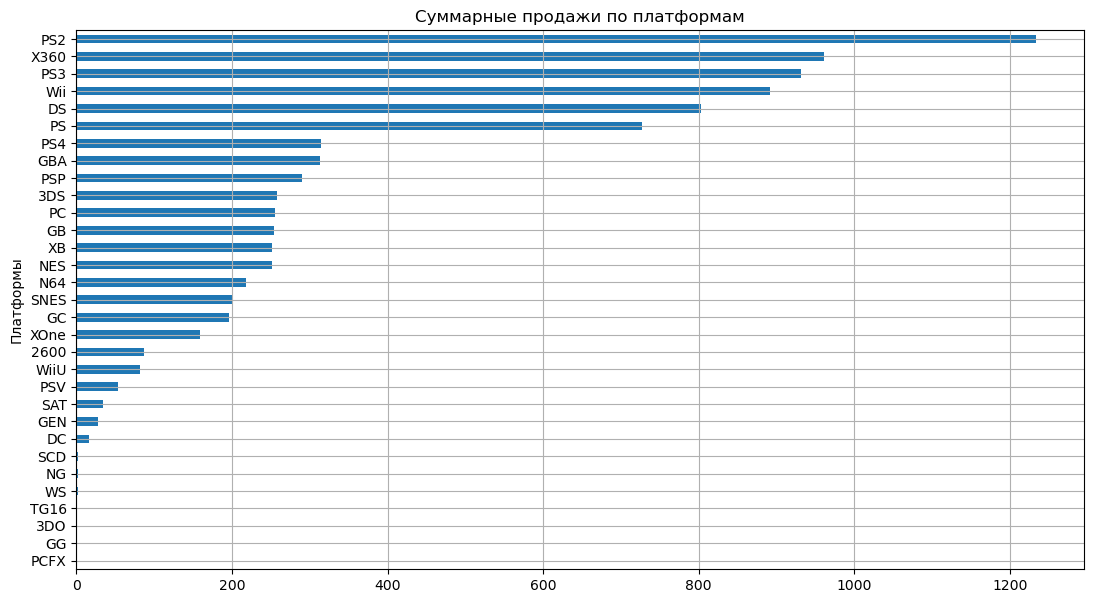

In [31]:
# Построим столбчатаю диаграмму по суммарным продажам всех платформ
sum_sales_platform = data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending = True)\
    .plot(kind='barh', legend=False, figsize = (13,7),\
          xlabel = 'Платформы', grid = True,\
          title = 'Суммарные продажи по платформам')
sum_sales_platform;

In [32]:
# Посмотрим наглядно на 6 самых продаваемых платформ.
data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending = False).head(6)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


Лидеры по продажам первые 6 платформ - 'PS2', 'X360', 'PS3','Wii', 'DS', 'PS'.

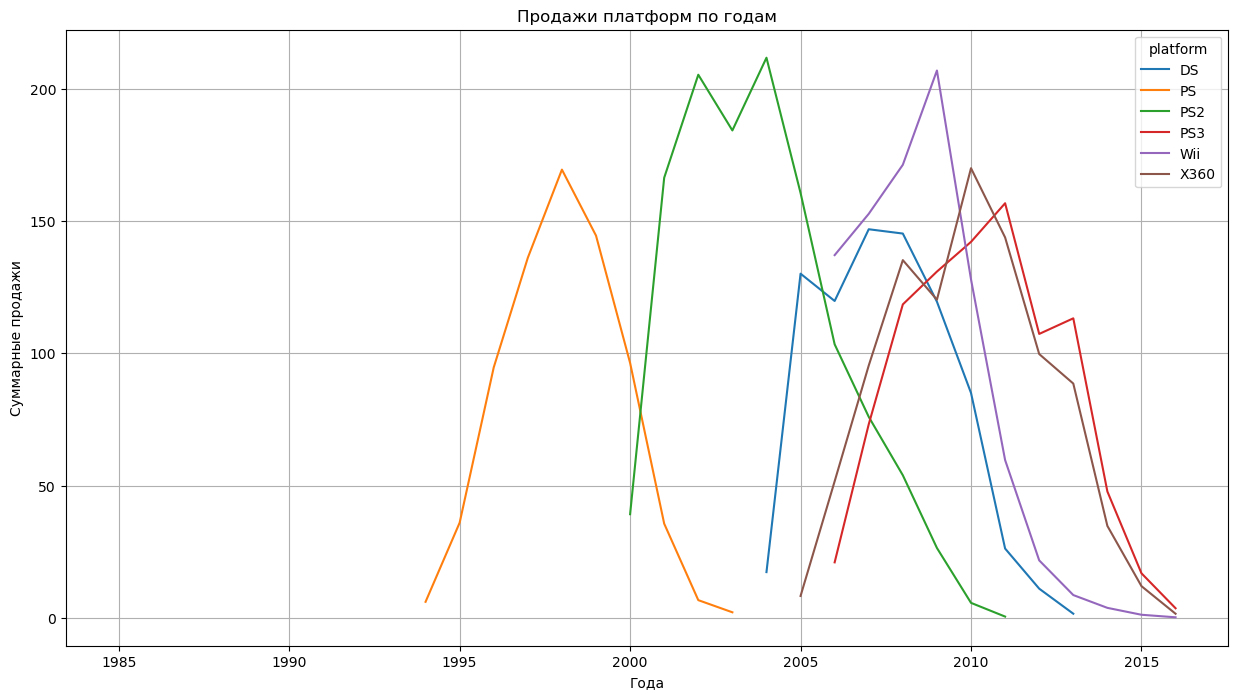

In [33]:
# Выберим из датасета только лидирующие по продажам платформы
# и построим график по годам, для наглядности активности платформ
platform = data.query("platform == ['PS2', 'X360', 'PS3','Wii', 'DS', 'PS']")
platform.pivot_table(index = 'year_of_release',\
                     columns = 'platform',\
                     values = 'sum_sales',\
                     aggfunc = 'sum')\
        .plot(figsize = (15,8), title = 'Продажи платформ по годам',\
              xlabel = 'Года',\
              ylabel = 'Суммарные продажи',\
              grid = True,\
             );

По графику видим, что взятые платформы к 2016 году перестали быть активными, срок их жизни в среднем держался 10 лет.

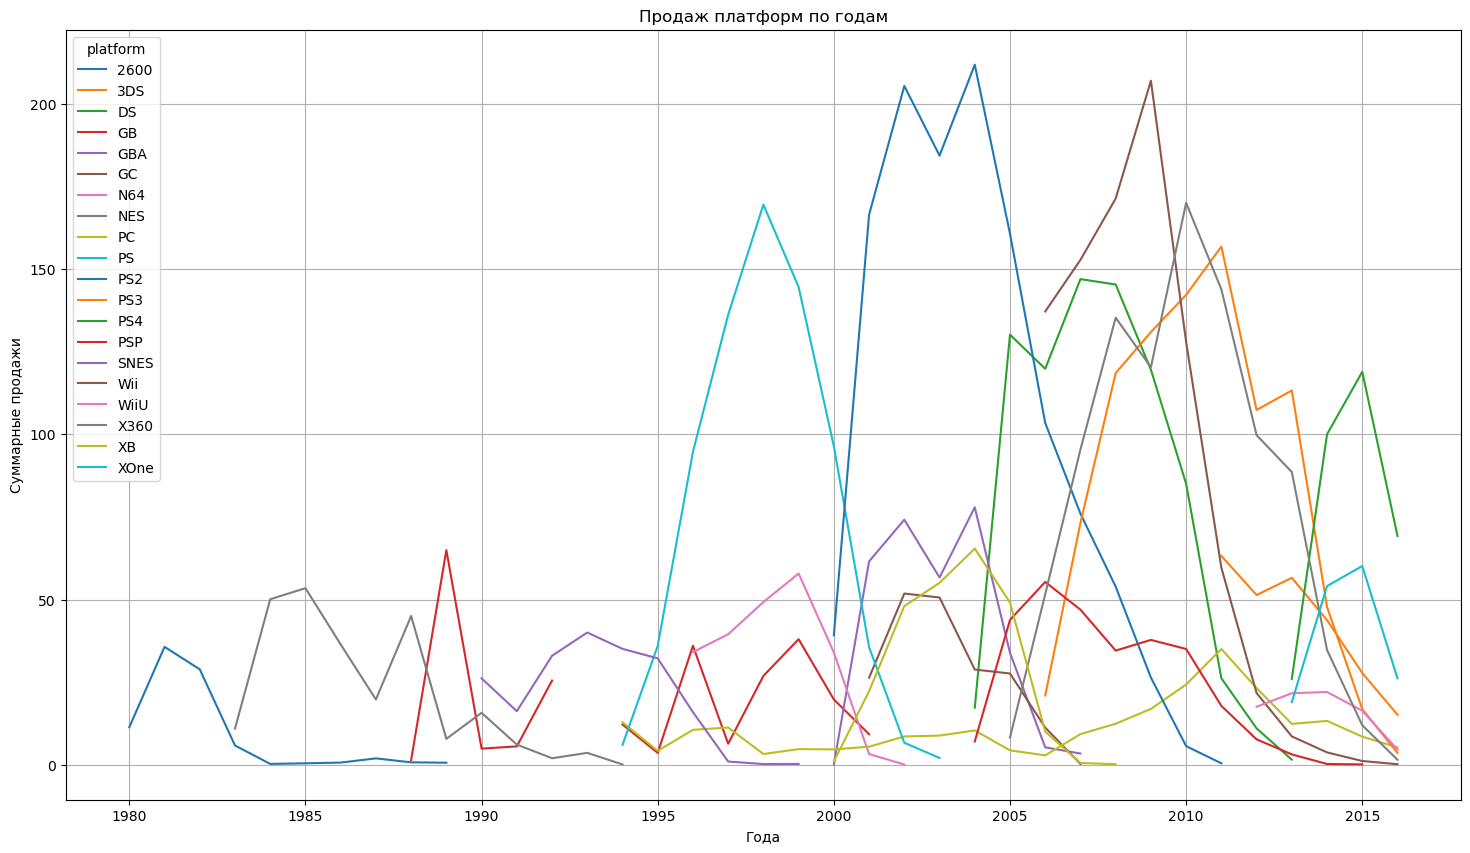

In [34]:
# Построим столбчатаю диаграмму топ 20 продаваемых платформ по годам их жизни
max_sum_sales = data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')\
                    .sort_values(by='sum_sales', ascending = False).head(20)
best_platform = max_sum_sales.index
data[data['platform'].isin(best_platform)].pivot_table(index = 'year_of_release',\
                                                        columns = 'platform',\
                                                        values = 'sum_sales',\
                                                        aggfunc = 'sum')\
                                           .plot(figsize = (18,10), title = 'Продаж платформ по годам', 
                                                 xlabel = 'Года', ylabel = 'Суммарные продажи', grid = True,\
                                                );

По данному распределению считаю нужным выбрать, такие платформы 'WiiU', 'PC', 'X360', '3DS', 'PS3', 'XOne', 'PS4' - ведь именно они остаются на плаву продаж до 2016 года, посмотрим их средний срок жизни построя диаграмму по годам продаж этих платформ, для определения их срока жизни. Эти платформы будем считать новыми. Так же на плаву были такие платформы как 'XB' и 'Wii', к 2016 эти платформы потеряли свою актуальность и мной было принято решение не брать их в счет, так как на смену пришли новые поколения этих же производителей. Персональный компьютер и на сей день является, одной из лучших систем для игроманов, поколение видеокарт и процессоров меняется в прогрессии, что оставляет персональные компьютеры актуальными до сих пор, возьмем его в нашу выборку.

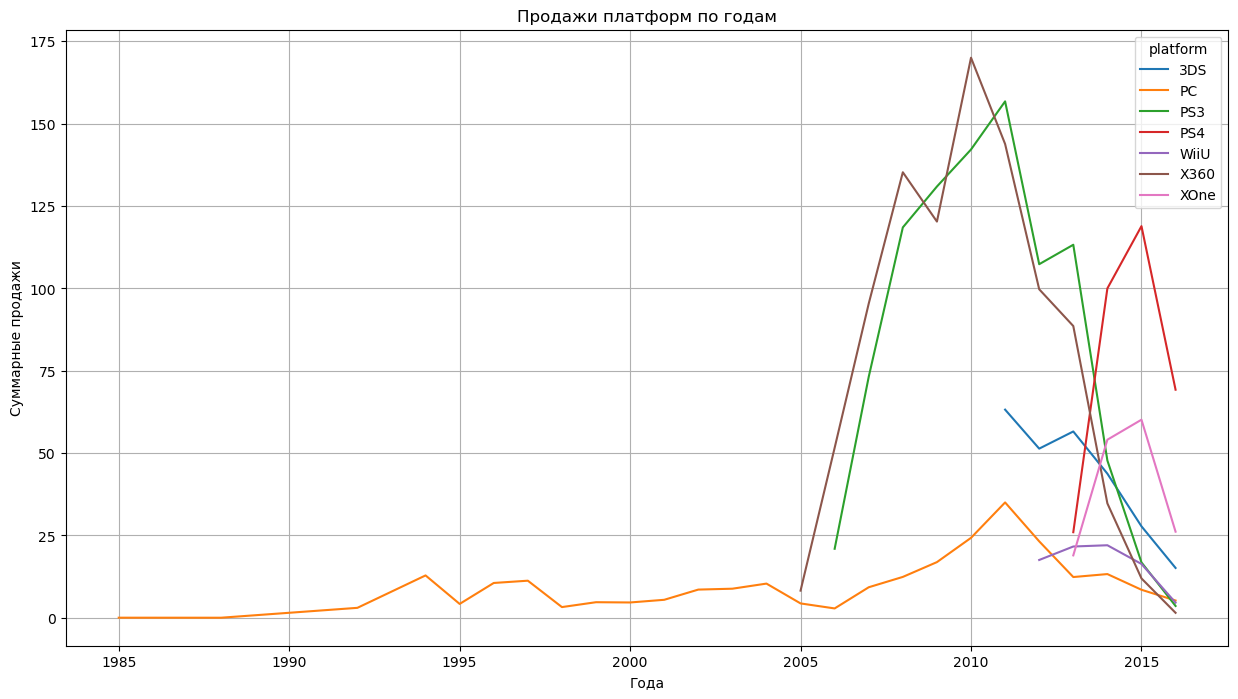

In [35]:
# Выберим из датасета только последние активные продажи платформы
# и построим график по годам, для наглядности активности платформ
data.query("platform == ['WiiU', 'PC', 'X360', '3DS', 'PS3', 'PS4', 'XOne']")\
    .pivot_table(index = 'year_of_release',\
                     columns = 'platform',\
                     values = 'sum_sales',\
                     aggfunc = 'sum')\
        .plot(figsize = (15,8), title = 'Продажи платформ по годам',\
              xlabel = 'Года',\
              ylabel = 'Суммарные продажи',\
              grid = True,\
             );

'X360' приходит к самому падению в продажах, данная платформа устарела по сравнению с остальными. 
По графику продаж новых платформ можно сказать, что средний срок их жизни 7 лет. 

На данном графики мы отобразили суммарные продажи платформ по годам их активности. 
С 1993 была выпущена платформа 'PS', пик активности приходился на 1998 год, до 2003 года платформа устарела. На смену ей выпустили платформу 'PS2' c 2000 года по 2005 год держала активность по продажам, но в период устаревания с 2005 года по 2011 вышли еще шесть платформ:
   - платформу 'DS' выпустили в 2004 году, стала устаревать с 2007 года и до 2013 прекратила активность;
   - персональный компьютер 'PC', как уже говорил выше является активным и по сегоднейший день, его продажи начинается с 1994 года и продолжаются по 2016 год, пик приходится на 2011 год;
   - платформу 'X360' выпустили в 2005 году, стала устаревать с 2010 года и до 2016 продолжается активность, но падение этой платформы говорит, что для бизнеса на следующий год не будет актуальна, и эту платформу сменяет новое покаление Xbox - 'Xone';
   - платформу 'Wii' выпустили в 2006 году, стала устаревать с 2009 года и до 2016 потеряла свою активность, на смену пришла ей платформа 'WiiU';
   - платформу 'PS3' выпустили в 2006 году, стала устаревать с 2011 года и до 2016 продолжается активность;
   - платформа '3DS' выпустили в 2011 году, стала устаревать с 2013 года и до 2016 продолжается активность;
   - И последняя платформа 'PS4' выпустили в 2013 году, и активность продаж продолжается.
   
Лидеры по продажам платформ являются - 'PS2', 'X360', 'PS3','Wii', 'DS', 'PS', средний срок их жизни составляет 10 лет.
Средний срок жизни новых платформ состовляет в среднем 7 лет.
Эти данные помогут нам определить актуальный период для дальнейшего исследования.

#### Возьмем данные за соответствующий актуальный период. Актуальный период выбрали с 2013 по 2016 год.

В нашем случае, чтобы определить актуальный период, будем опираться на данные активности за последние 4 года, так как из бизнес-соображений это самый подходящий период, он показывает появление новых платформ и их устойчивость до 2016 года. И в мире видео игр быстро меняются системные требования, устаревшие платформы уже не предназначены для высоких требований видеоигр, и на их место приходят новые поколения, но не всегда так, как в случает с 'PC'.

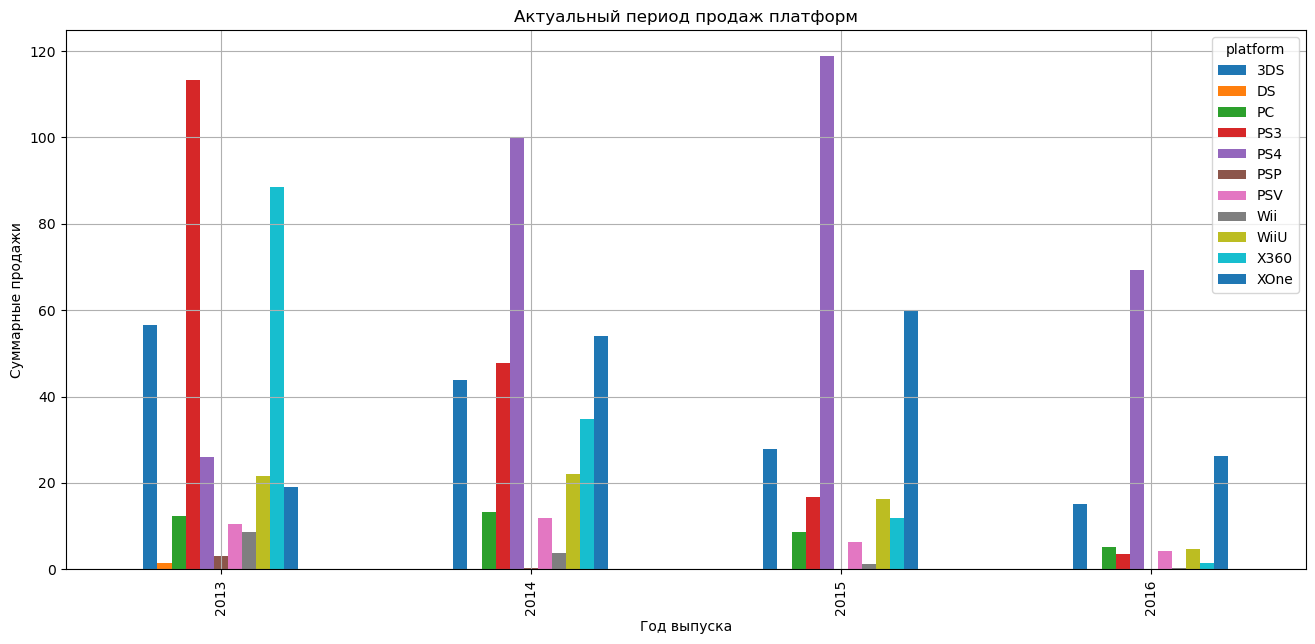

In [36]:
# Создадим новый датасет с актуальным периодом, который выбрали с 2013 по 2016, для прогноза на 2017 год.
# Выполним логическую фильрацию по интересующим нам годам
actual_data = data.query("year_of_release > 2012")
actual_data.pivot_table(index = 'year_of_release',columns = 'platform', values = 'sum_sales', aggfunc = 'sum')\
           .plot(kind = 'bar', figsize = (16,7), grid = True,\
                 title = 'Актуальный период продаж платформ', xlabel = 'Год выпуска', ylabel = 'Суммарные продажи');

По данному графику определим самые перспективные платформы:
    - в 2013 году лидерами были 3 платформы - '3DS', 'PS3', 'X360';
    - в 2014 году остаются на плаву те же, что и в 2013, но появляются два других лидера это 'XOne' и 'PS4';
    - в 2015 году 'PS4' и 'XOne' показывают пик, а остальные лидеры за прошлые 2 года падают, но остаются актуальными;
    - в 2016 году все платформы падают в продажах, платформа 'Wii' пропадает из вида, а 'X360' приближается к той же отметки, но еще на плаву.
Платформа 'PSV' на всем протяжении актуального периода была в низах, эта платформа не перспективна на 2017 год.
Так как 'PS3' показывала успех до 2015 года и в 2016 году значительно упала, есть вероятность того, что платформа при хорошей рекламе и поддержки от прозводителя продержится до 2017 года.
Выбранный актуальный период показывает, что перспективными платформами для прогноза на 2017 год являются 'WiiU', 'PS3', 'PC', '3DS' и самые перспективные 'PS4',  'XOne'.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [37]:
# Выполним срез исходного датасета по актуальному периоду и перспективным платформам
actual_data1 = data.query("platform == ['WiiU', 'PS3', 'PC', '3DS', 'XOne', 'PS4'] & year_of_release > 2012")

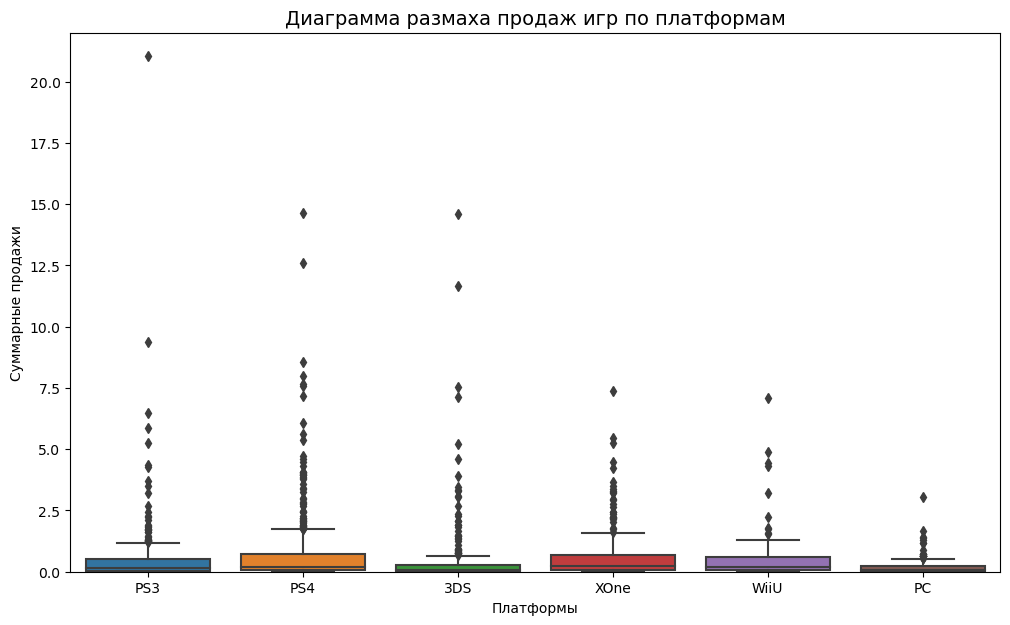

In [38]:
# Построим диаграмму размаха и взглянем на выбросы
plt.figure(figsize=(12,7)) # зададим фигуру размера нашей диаграмме
sns.boxplot(x=actual_data1['platform'], y=actual_data1['sum_sales'])
plt.ylim(0,22)
plt.title('Диаграмма размаха продаж игр по платформам', fontsize = 14)
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

Данный график тяжело читать так как в каждой платформе присутствуют очень успешные видеоигры, и они выделяются выбросами, изменим масштаб на более крупный и построим диаграмму размаха еще раз.

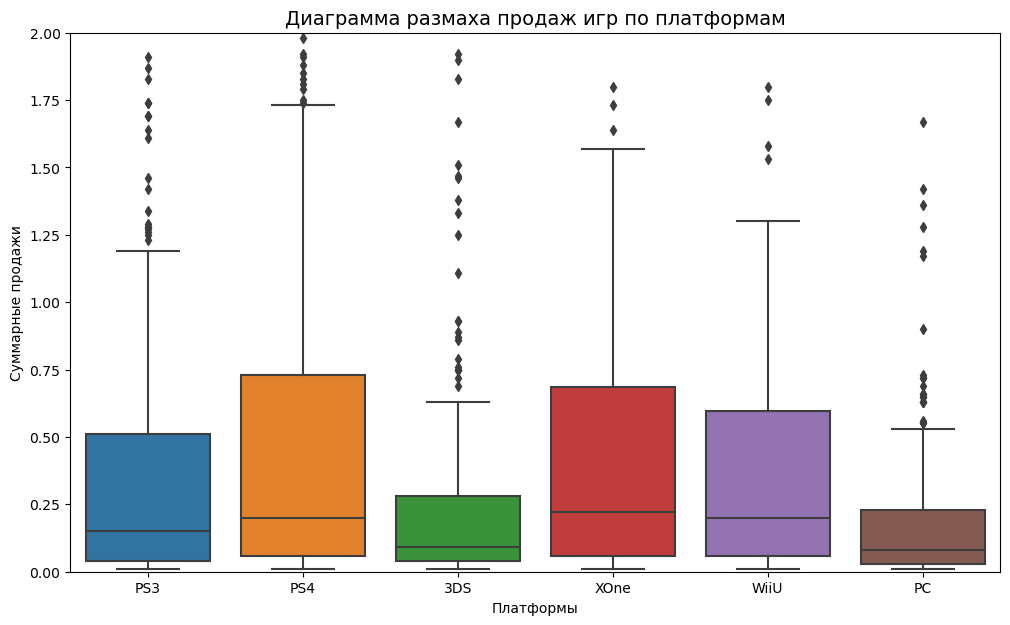

In [39]:
plt.figure(figsize=(12,7)) # зададим фигуру размера нашей диаграмме
sns.boxplot(x=actual_data1['platform'], y=actual_data1['sum_sales'])
plt.ylim(0,2)
plt.title('Диаграмма размаха продаж игр по платформам', fontsize = 14)
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

In [40]:
# Посмотрим на числовое описание данных
actual_data1.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.00,0.47,1.38,0.01,0.04,0.09,0.28,14.60
PC,189.00,0.21,0.35,0.01,0.03,0.08,0.23,3.05
PS3,345.00,0.53,1.45,0.01,0.04,0.15,0.51,21.05
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
WiiU,115.00,0.56,1.04,0.01,0.06,0.20,0.60,7.09
XOne,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39


На диаграмме лучше видно усы и медиану. Межквартильное расстояние больше всех у "PS4" и "XOne", они лидируют в продажах и медианное значение больше остальных платформ. Самые низкие продажи у платформ 'PC' и '3DS'.
Есть редкие выбывающие значения, но возможно это какие-то крупные еденичные продажи. 

<div class="alert alert-info"> <b>Комментарии студента:</b> Замечание по твоему комментарию исправил.</div>

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы.

Корреляция между отзывами и продажами: 0.40656790206178123


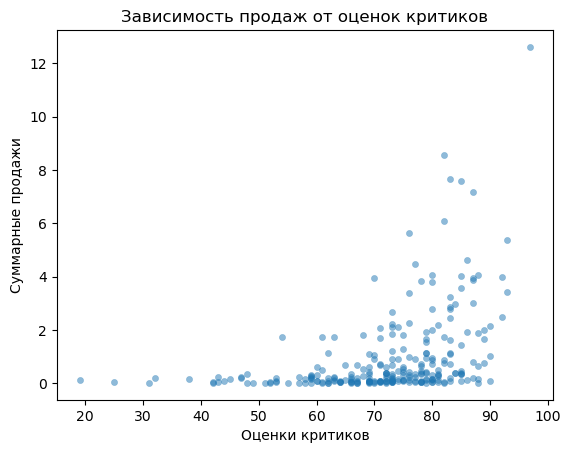

In [41]:
# Сначала найдем зависимость продаж от оценок критиков.
#Выполним фильрацию по популярной платформе, затем построим диаграмму рассеяния и вычислим корреляцию между отзывами и продажами.
actual_ps4_c = actual_data1.query("platform == 'PS4'")
actual_ps4_c.plot(x='critic_score', y='sum_sales', kind='scatter',\
                     linewidth= 0.3, alpha = 0.5, xlabel = 'Оценки критиков',\
                     ylabel = 'Суммарные продажи', title = 'Зависимость продаж от оценок критиков')
print(f"Корреляция между отзывами и продажами: {actual_ps4_c['critic_score'].corr(actual_ps4_c['sum_sales'])}")

Коэффициенту корреляции Пирсона 0.40, свзяь продаж от оценок критиков есть, но она слабая. Большое скопление продаж в зоне оценок от 57 до 90. В этой зоне оценки высокие, тем самым и продажи.

Корреляция между отзывами и продажами: -0.03195711020455644


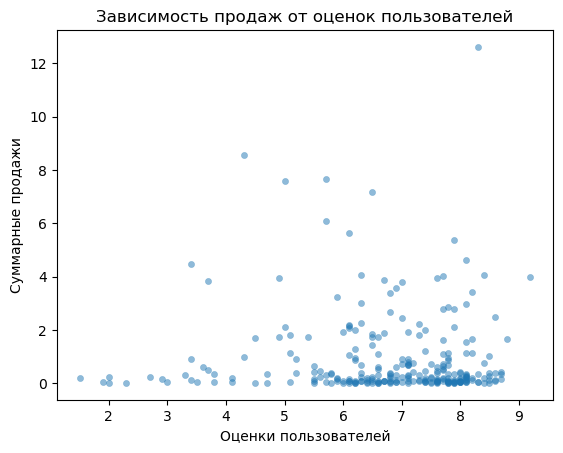

In [42]:
#Теперь зависимость продаж от оценок пользователей
actual_ps4_u = actual_data1.query("platform == 'PS4'")
actual_ps4_u.plot(x='user_score', y='sum_sales', kind='scatter',\
                     linewidth= 0.3, alpha = 0.5, xlabel = 'Оценки пользователей',\
                     ylabel = 'Суммарные продажи', title = 'Зависимость продаж от оценок пользователей')
print(f"Корреляция между отзывами и продажами: {actual_ps4_u['user_score'].corr(actual_ps4_u['sum_sales'])}")

Коэффициент корреляции Пирсона отрицательный -0.031, так же стремится к нулю, связь продаж от оценок пользователей отсутствует.

#### Соотнесем выводы с продажами игр на другой платформе

По предыдущим заданием определили две самые перспективные и продоваемые платформы 'PS4' и 'XOne'. Поэтому выбирем вторую платформу 'XOne' для определения зависимости продаж от оценок.

Корреляция между отзывами и продажами: -0.06892505328279418


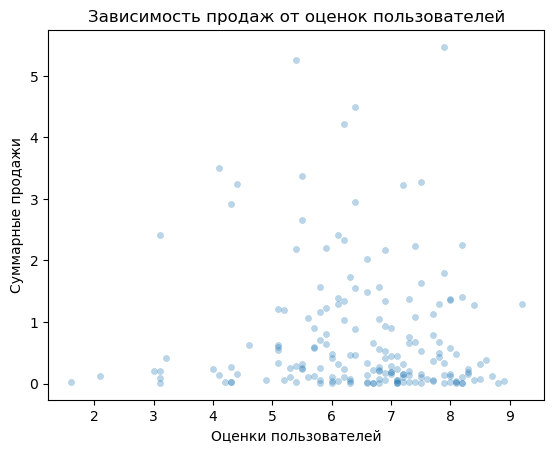

In [43]:
actual_xone_u = actual_data1.query("platform == 'XOne'")
actual_xone_u.plot(x='user_score', y='sum_sales', kind='scatter',\
                     linewidth= 0.3, alpha = 0.3, xlabel = 'Оценки пользователей',\
                     ylabel = 'Суммарные продажи', title = 'Зависимость продаж от оценок пользователей')
print(f"Корреляция между отзывами и продажами: {actual_xone_u['user_score'].corr(actual_xone_u['sum_sales'])}")

Коэффициент корреляции Пирсона -0.068, так же стремится к нулю, связь продаж от оценок пользователей отсутствует.
Так же видно, чем больше высоких оценок, тем больше продаж.

Корреляция между отзывами и продажами: 0.41699832800840153


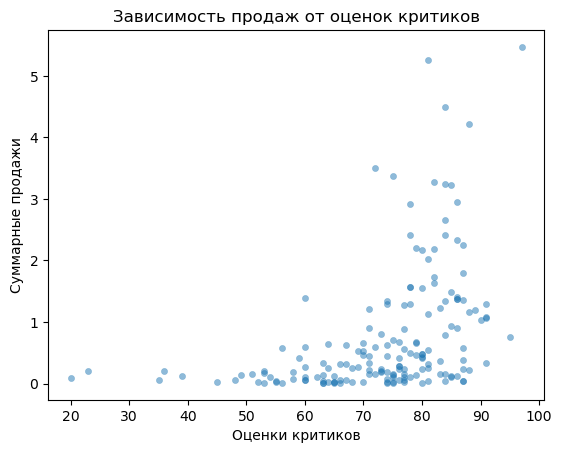

In [44]:
actual_xone_с = actual_data1.query("platform == 'XOne'")
actual_xone_с.plot(x='critic_score', y='sum_sales', kind='scatter',\
                     linewidth= 0.3, alpha = 0.5, xlabel = 'Оценки критиков',\
                     ylabel = 'Суммарные продажи', title = 'Зависимость продаж от оценок критиков')
print(f"Корреляция между отзывами и продажами: {actual_xone_с['critic_score'].corr(actual_xone_с['sum_sales'])}")

Коэффициент корреляции Пирсона положительная 0.41, связь продаж от оценок критиков есть, но она слабая.
В диапозоне оценок критиков с 60 по 90 видно небольшое скопление продаж. Оценки критиков влияют на продажи хоть и не сильно.
Тем самым можно сказать, что для двух платформ оценки критиков имеют влияние на продажи, в отличие от оценок пользователей, что для первой и второй платформы.

Рассмотрим еще одну платформу, слудующую по продажам 'WiiU'

Корреляция между отзывами и продажами: 0.37641490654239124


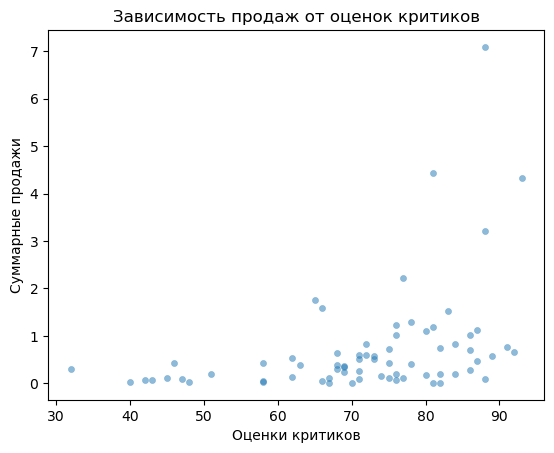

In [45]:
# Возьмем еще одну платформу для определения взаимосвязи продаж от отзывов. 
actual_wiiu_с = actual_data1.query("platform == 'WiiU'")
actual_wiiu_с.plot(x='critic_score', y='sum_sales', kind='scatter',\
                     linewidth= 0.3, alpha = 0.5, xlabel = 'Оценки критиков',\
                     ylabel = 'Суммарные продажи', title = 'Зависимость продаж от оценок критиков')
print(f"Корреляция между отзывами и продажами: {actual_wiiu_с['critic_score'].corr(actual_wiiu_с['sum_sales'])}")

Коэффициент корреляции Пирсона 0.376, связь продаж от оценок критиков слабая, но есть.

Корреляция между отзывами и продажами: 0.41933048192661854


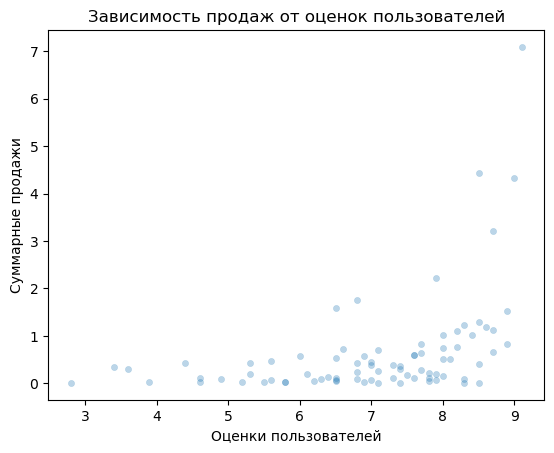

In [46]:
actual_wiiu_u = actual_data1.query("platform == 'WiiU'")
actual_wiiu_u.plot(x='user_score', y='sum_sales', kind='scatter',\
                     linewidth= 0.3, alpha = 0.3, xlabel = 'Оценки пользователей',\
                     ylabel = 'Суммарные продажи', title = 'Зависимость продаж от оценок пользователей')
print(f"Корреляция между отзывами и продажами: {actual_wiiu_u['user_score'].corr(actual_wiiu_u['sum_sales'])}")

Коэффициент корреляции Пирсона 0.419, связь продаж от оценок пользователей слабая, но есть.

По корреляции Пирсона видно, что у трех выбранных платформ есть связь продаж от оценок критиков, но слабая, а вот от оценок пользователей связь только у платформы 'WiiU'.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [47]:
# Посмотрим числовое описание данных для продаж по жанрам.
# Отсортируем по медиане, так как она покажет стабильный прирост дохода.
actual_data1.groupby('genre')['sum_sales'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,151.00,1.30,2.06,0.01,0.14,0.45,1.58,14.63
Sports,157.00,0.77,1.33,0.01,0.08,0.26,0.78,8.58
Platform,58.00,0.64,0.85,0.01,0.09,0.26,0.93,4.32
Role-Playing,199.00,0.65,1.61,0.01,0.06,0.17,0.58,14.60
Fighting,62.00,0.51,1.17,0.01,0.05,0.14,0.35,7.55
Action,557.00,0.47,1.28,0.01,0.04,0.12,0.42,21.05
Misc,111.00,0.35,0.73,0.01,0.03,0.12,0.38,5.27
Racing,70.00,0.52,1.05,0.01,0.04,0.12,0.42,7.09
Simulation,53.00,0.39,0.91,0.01,0.03,0.10,0.32,5.22


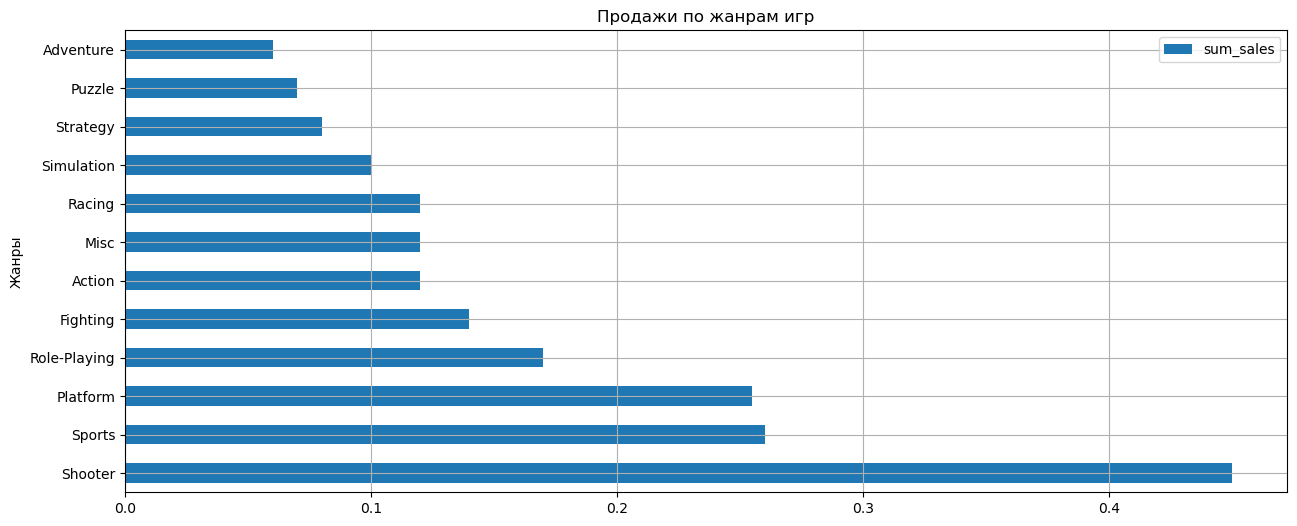

In [48]:
# Cгруппируем актуальный датасет для продаж по жанрам
# Построим гистограмму для наглядности низких и высоких продаж по жанрам
actual_data1.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median')\
           .sort_values(by = 'sum_sales', ascending = False)\
           .plot(grid = True, figsize = (15,6), kind = 'barh', xlabel = 'Жанры', ylabel = 'Продажи',
                 title = 'Продажи по жанрам игр'
                );

Наиболее высокие продажи по медианне:
                          * Первое место - 'Shooter',
                          * Второе место - 'Sports',
                          * Третье место - 'Platform'. 
Самые низкие продажи: 
                      - 'Adventure',
                      - 'Puzzle',
                      - 'Strategy'.

### Составим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP):
- Найдем популярные платформы (топ-5) для пользователей каждого региона. Опишим различия в долях продаж.

Определим топ 5 платформ по продажам Северной Америки.

In [49]:
# Выполним группировку по платформам и отсортируем по убыванию, вытащим первые пять платформ, они и будут нашим топом.
na_data = data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
              .sort_values('na_sales', ascending = False).head()
na_data

,na_sales
platform,
X360,595.74
PS2,572.92
Wii,486.87
PS3,390.13
DS,380.31


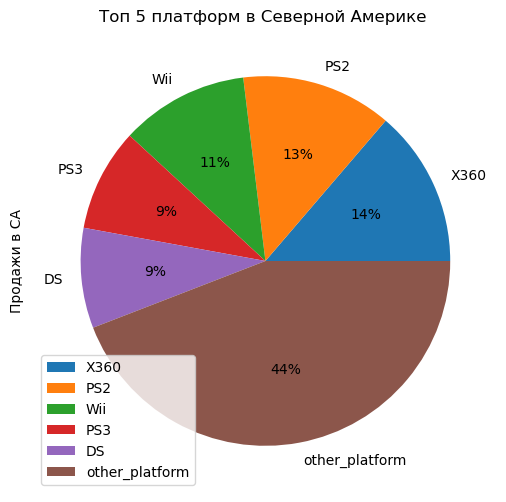

In [50]:
# Построим круговую диаграмму, сначала вытащим все платформы по суммарным продажам и отсортируем по убыванию, создадим новый 
# столбец в который положим все остальные платформы кроме топ 5, и и к итоговому датасету применим круговую диаграмму, где отобразим долю в процентном виде.
na_data_eve = data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
                  .sort_values('na_sales', ascending = False)
na_data.loc['other_platform', 'na_sales'] = na_data_eve.iloc[5:].sum()[0]
na_data.plot(kind = 'pie', y = 'na_sales', autopct = '%.0f%%', figsize = (12,6),\
             title = 'Топ 5 платформ в Северной Америке ',\
             ylabel = 'Продажи в СА');

На данной круговой диаграмме отобразили топ 5 платформ и остальные в долях продаж Северной Америки.

Определим топ 5 платформ по продажам в Европе.

In [51]:
# Аналогичным образом для Европы.
eu_data = data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
              .sort_values('eu_sales', ascending = False).head()
eu_data

,eu_sales
platform,
PS2,332.63
PS3,327.20
X360,268.32
Wii,258.32
PS,212.39


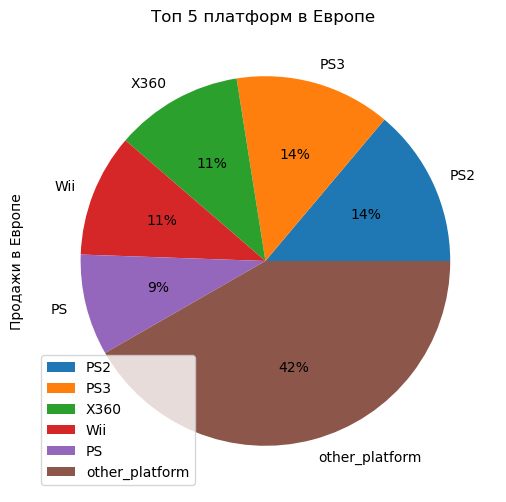

In [52]:
eu_data_eve = data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
                  .sort_values('eu_sales', ascending = False)
eu_data.loc['other_platform', 'eu_sales'] = eu_data_eve.iloc[5:].sum()[0]
eu_data.plot(kind = 'pie', y = 'eu_sales', autopct = '%.0f%%', figsize = (12,6),\
             title = 'Топ 5 платформ в Европе ',\
             ylabel = 'Продажи в Европе');

На данной круговой диаграмме отобразили топ 5 платформ и остальные в долях продаж  Европы.

Определим топ 5 платформ по продажам в Японии.

In [53]:
jp_data = data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
              .sort_values('jp_sales', ascending = False).head()
jp_data

,jp_sales
platform,
DS,175.02
PS,139.78
PS2,137.54
SNES,116.55
3DS,100.62


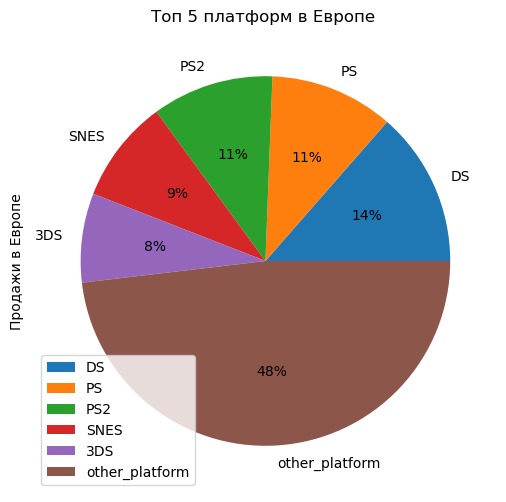

In [54]:
jp_data_eve = data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
                  .sort_values('jp_sales', ascending = False)
jp_data.loc['other_platform', 'jp_sales'] = jp_data_eve.iloc[5:].sum()[0]
jp_data.plot(kind = 'pie', y = 'jp_sales', autopct = '%.0f%%', figsize = (12,6),\
             title = 'Топ 5 платформ в Европе ',\
             ylabel = 'Продажи в Европе');

На данной круговой диаграмме отобразили топ 5 платформ и остальные в долях продаж  Японии.

#### Найдем популярные жанры (топ-5) для пользователей каждого региона. Поясниим разницу.

Определим популярные жанры по продажам в Северной Америки.

In [55]:
na_genre = data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')\
              .sort_values('na_sales', ascending = False).head()
na_genre

,na_sales
genre,
Action,863.17
Sports,671.20
Shooter,584.83
Platform,444.44
Misc,399.57


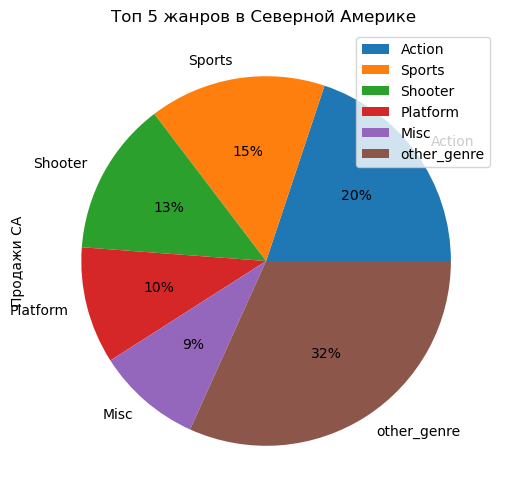

In [56]:
na_genre_eve = data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')\
                  .sort_values('na_sales', ascending = False)
na_genre.loc['other_genre', 'na_sales'] = na_genre_eve.iloc[5:].sum()[0]
na_genre.plot(kind = 'pie', y = 'na_sales', autopct = '%.0f%%', figsize = (12,6),\
             title = 'Топ 5 жанров в Северной Америке ',\
             ylabel = 'Продажи СА');

Определили доли самых популярных жанров для пользователей Северной Америки и доли не популярных жанров.

Определим популярные жанры по продажам в Европе.

In [57]:
eu_genre = data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')\
              .sort_values('eu_sales', ascending = False).head()
eu_genre

,eu_sales
genre,
Action,510.99
Sports,371.32
Shooter,314.52
Racing,234.49
Misc,210.60


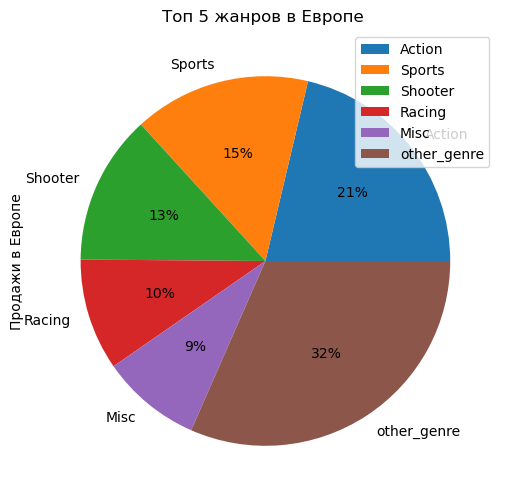

In [58]:
eu_genre_eve = data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')\
                  .sort_values('eu_sales', ascending = False)
eu_genre.loc['other_genre', 'eu_sales'] = eu_genre_eve.iloc[5:].sum()[0]
eu_genre.plot(kind = 'pie', y = 'eu_sales', autopct = '%.0f%%', figsize = (12,6),\
             title = 'Топ 5 жанров в Европе ',\
             ylabel = 'Продажи в Европе');

Определили доли самых популярных жанров для пользователей Европы и доли непопулярных жанров.

Определим популярные жанры по продажам в Японии.

In [59]:
jp_genre = data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')\
              .sort_values('jp_sales', ascending = False).head()
jp_genre

,jp_sales
genre,
Role-Playing,353.39
Action,160.14
Sports,134.93
Platform,130.71
Misc,107.02


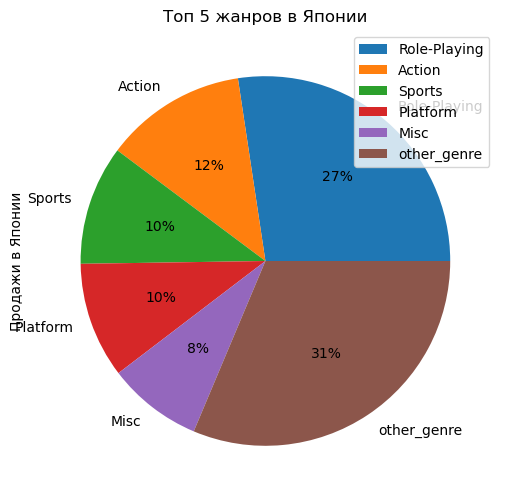

In [60]:
jp_genre_eve = data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')\
                  .sort_values('jp_sales', ascending = False)
jp_genre.loc['other_genre', 'jp_sales'] = jp_genre_eve.iloc[5:].sum()[0]
jp_genre.plot(kind = 'pie', y = 'jp_sales', autopct = '%.0f%%', figsize = (12,6),\
             title = 'Топ 5 жанров в Японии',\
             ylabel = 'Продажи в Японии');

Определили доли самых популярных жанров для пользователей Японии и доли непопулярных жанров.

В Северной Америке и Европе лидер по продажам, игры в жанре 'Action', а в Японии игры в жанре 'Role-Playing'.

#### Определим влияет ли рейтинг ESRB на продажи в отдельных регионах.

In [61]:
# Группируем по рейтингу все продажи в отдельных регионах и отсортируем по убыванию
rating_sales = actual_data.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')\
              .sort_values(by = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], ascending = False)
rating_sales.index = rating_sales.index.rename('Рейтинг ESRB')
rating_sales = rating_sales.rename(columns = {'na_sales':'Продажи NA', 'eu_sales':'Продажи EU',\
                                              'jp_sales':'Продажи JP', 'other_sales':'Продажи  в других регионах',},\
                                   level = 0)
rating_sales

,Продажи EU,Продажи JP,Продажи NA,Продажи в других регионах
Рейтинг ESRB,,,,
M,145.32,14.11,165.21,47.04
unknown,78.91,85.05,89.42,23.46
E,83.36,15.14,79.05,22.61
E10+,42.69,5.89,54.24,12.57
T,41.95,20.59,49.79,14.29


* В данной таблице выделим топ 5 возрастных категорий для компьютерных игр по регионам. 
 - По Северной Америке, Европе и других регионах, кроме Японии продажи компьютерных игр c Возростная категория 'М', подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Эта категория лидирует среди этих регионов по популярности. Вторая по популярности возростная группа имеет неизвестную возрастную категорию, и так же популярна среди пользователей этих регионов. продажи компьютерных игр c "возрастной категорией для всех" является третьей в продажах. Возростная категория 'T', подходит для лиц старше 13 лет, и она занимает четвертую строчку популярности продаж компьютерных игр. И пятую строчку популярных категорий компьютерных игр занимает возростная категория 'для лиц старше 10 лет'. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Остальные категории не так популярны для покупки компьютерных игр.
 
 - Что не скажем о Японии, в Японии наоборот продажи компьютерных игр с неизвестной возрастной категорией лидируют по продажам. На втором месте популярности категория 'подходит для лиц старше 13 лет'. Следующая по популярности - это продажи компьютерных игр c "возрастной категорией для всех". Так же добавлю ESRB - это целевой рейтинг для игр на рынке США и Канады, для игр на рынке Европы используют PEGI, а у Японии  CERO. Поэтому и присутствуют отличия Японии от других регионов.

### Проверим гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Сформулируем нулевую и альтернативную гипотезу для данного случая: <br/>
$H_0$: Средние пользовательские рейтинги платформ Xbox One и PC равны;<br/>
$H_1$: Средние пользовательские рейтинги платформ Xbox One и PC не равны;

In [62]:
# Импортируем из библиотеку подпакет для статистических операций
from scipy import stats as st
# Отфильтровываем датасет по нужным нам платформам 
# и не забудем убрать в нашей выборке по пользовательским оценкам пропущенные значения
xbox_one = data.query("platform == 'XOne' & user_score.isna() == False")['user_score']
pc = data.query("platform == 'PC' & user_score.isna() == False")['user_score']
# Критический уровень статистической значимости выберем 0.05
alpha = .05
# Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:
results = st.ttest_ind (xbox_one, pc)
# значение вероятности при верной нулевой гипотезе 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


In [63]:
xbox_one.mean()

6.52142857142857

In [64]:
pc.mean()

7.065960264900677

#### Средние пользовательские рейтинги жанров Action  и Sports  разные.

* Сформулируем нулевую и альтернативную гипотезу для данного случая: <br/>
$H_0$: Средние пользовательские рейтинги жанров Action и Sports равны;<br/>
$H_1$: Средние пользовательские рейтинги жанров Action и Sports не равны;

In [65]:
# выполним для жанров тоже самое
action = data.query("genre == 'Action' & user_score.isna() == False")['user_score']
sports = data.query("genre == 'Sports' & user_score.isna() == False")['user_score']
results = st.ttest_ind (action, sports)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06833686503882228
Не получилось отвергнуть нулевую гипотезу


In [66]:
action.mean()

7.058129175946543

In [67]:
sports.mean()

6.9527777777777775

### Общий вывод

- Для начала был открыт файл с данными  интернет-магазина «Стримчик» до 2016 года, который продаёт по всему миру компьютерные игры. Перед нами стояла задача - выявить определяющие успешность игры закономерности. Это позволило сделать ставку на потенциально популярный продукт для прогноза на 2017 год. 
- Подготовили данные для дальнейшего анализа, а именно преобразовали каждый столбец датасета к нижнему регистру, для красивого и наглядного отображения, преобразовали нужные столбцы к правильному типу данных, обработали пропущенные значения и удалили пропуски в столбцах 'название игр', 'игровой жанр', так как пропущенных значений очень мало и они никак не влияли на дальнейшие действия, определили возникновение пропусков, они могли возникнуть из-за ошибки заполнения, а так же человеческого фактора, в столбце рейтинг от организации ESRB пропуски возникли не просто так, возможно такие игры не попадали под сертификацию, а так же для разных регионов есть свои организации определяющие рейтинг для компьютерных игр, заменили пропущенные значения на подходящие по смыслу значения. Определили суммарные продажи для каждого региона и записали из в новый столбец.
- Провели исследовательский анализ данных путем построения графиков, определили кол-во игр выпускаимых в разные годы, выбрали платформы с наибольшими суммарными продажами и построили распределение по годам, что дало нам определить активность продаж платформ, после чего мы создали новый датасет с актуальными по нашему мнению годами и платформами, построили диаграмму размаха в разбивке по топ платформам, построили диаграмму рассеяния и вычислили корреляцию между отзывами и продажами, это дало понять нам, что есть связь между отзывами критиков и продажами платформ в отличие отзывов пользователей, нашли самые высокие и самые низкие продажи по жанру комьютерных игр.
- Изучили самые популярные платформы и жанры компьютерных игр для пользователей каждого региона, отобразили на круговых диаграммах доли продаж. Определили влияет ли рейтинг ESRB на продажи в отдельных регионах и получлось, что для Северной Америки, Европы и других регионов, кроме Японии продажи компьютерных игр c "возрастной категорией для всех" является лидирами в продажах, в то время как вторая возростная группа имеет неизвестную возрастную категорию, и так же популярна среди пользователей этих регионов, а в Японии наоборот продажи компьютерных игр с неизвестной возрастной категорией лидируют по продажам, это из-за того, что ESRB - это целевой рейтинг для игр на рынке США и Канады, для игр на рынке Европы используют PEGI, а у Японии CERO. Поэтому и присутствуют отличия Японии от других регионов.
- Сформулировали гипотезы и проверили средние пользовательские рейтинги платформ Xbox One и PC одинаковые ли они или разные, а также проверили средние пользовательские рейтинги жанров Action и Sports одинаковые ли они или разные.
- По итогу могу сказать, что был проанализирован период с 2013 - 2016 года, для этого актуального периода мы выбрали 2 платформы 'PS4' и 'XOne' эти платформы являются самыми популярными в продажах и держали стабильные продажи, ввиду этого можно сделать вывод, что 'PS4' и 'XOne' подходит для продвижения на рынок 2017 года, так как она до 2016 остается актуальной и популярной среди пользователей большинства регионов.
- Самые популярные жанры компьютерных игр являются 'Action' для стран Северной Америки и Европы, а у Японии предпочитают жанр 'Shooter'. 
- Лучшими играми по рейтингу организации ESRB можно считать возростную категория 'М', подходит для лиц старше 17 лет для стран Северной Америки и Европы, у Японии лидером стала категория не имеющая наименования, но добавлю ESRB - это целевой рейтинг для игр на рынке США и Канады, для игр на рынке Европы используют PEGI, а у Японии CERO. Поэтому и присутствуют отличия Японии от других регионов.